In [1]:
import pandas as pd

In [2]:
%ls

README.md                gdp_per_capita_2020.csv  oece_bli_2020.csv
Untitled.ipynb           gdp_per_capita_2020.xls
gdp_per_capita.csv       oecd_bli_2015.csv


In [17]:
oecd_bli = pd.read_csv("oece_bli_2020.csv", thousands=',')

oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In [23]:
gdp_per_capita = pd.read_excel("gdp_per_capita_2020.xlsx")

In [21]:
gdp_per_capita.columns

Index([           'Subject Descriptor',                         'Units',
                               'Scale', 'Country/Series-specific Notes',
                                  2020,         'Estimates Start After'],
      dtype='object')

In [24]:
gdp_per_capita.rename(columns={2020: "GDP per capita"}, inplace=True) # "2015" 컬럼 이름을 "GDP per capita" 로 변경 
gdp_per_capita.set_index("Country", inplace=True)

# 알파벳 순으로 첫 5개 국가 GDP 정보 확인
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",499.441,2019.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4898.277,2018.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3331.076,2019.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2021.310,2017.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14158.571,2011.0


In [25]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

In [31]:
full_country_stats.tail()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
United States,10.0,0.1,91.0,11.09,70.0,73.9,5.5,45284.0,632100.0,19.0,...,14.44,65.0,83.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",63051.398,2019.0
Norway,5.0,0.0,82.0,2.93,74.0,90.1,0.4,35725.0,228936.0,17.0,...,15.56,78.0,98.0,18.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",67988.591,2018.0
Ireland,7.0,1.0,82.0,5.25,67.0,75.9,0.7,25310.0,217130.0,20.0,...,NaN,65.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",79668.502,2019.0
Switzerland,15.0,0.1,88.0,0.37,80.0,85.3,0.6,37466.0,NaN,22.0,...,NaN,49.0,95.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",81867.462,2019.0
Luxembourg,12.0,0.5,77.0,3.82,66.0,75.8,0.6,39264.0,769053.0,21.0,...,NaN,91.0,84.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",109602.322,2018.0


In [64]:
# 7개 국가의 행 인덱스를 전체 인덱스 집합에서 제거
remove_indices = [1, 2, 4, 6, 37, 38, 39]
keep_indices = list(set(range(36)) - set(remove_indices))

# 제외된 7개 국가의 행과 나머지 국가의 행을 구분하여 두 개의 데이터프레임 지정
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices] # 7개 국가를 제외한 국가들의 1인당 GDP와 삶의 만족도 데이터
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices] # 제외된 7개 국가의 1인당 GGP와 삶의 만족도 데이터

In [65]:
import matplotlib.pyplot as plt

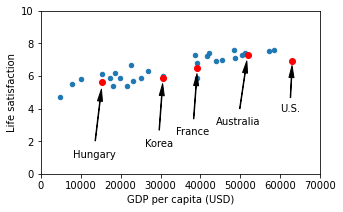

In [98]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 70000, 0, 10])

# 언급된 5개 국가명 명기 좌표
position_text = {
    "Hungary": (8000, 1),
    "Korea": (26000, 1.7),
    "France": (34000, 2.4),
    "Australia": (44000, 3.0),
    "United States": (60000, 3.8),
}

# 5개 국가는 좌표를 이용하여 빨강색 점으로 표기
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    # 5개 국가명 표기
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    # 5개 국가 산점도 그리기
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
plt.show()